<a href="https://colab.research.google.com/github/Dileep1610/Capstone-Project-1-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

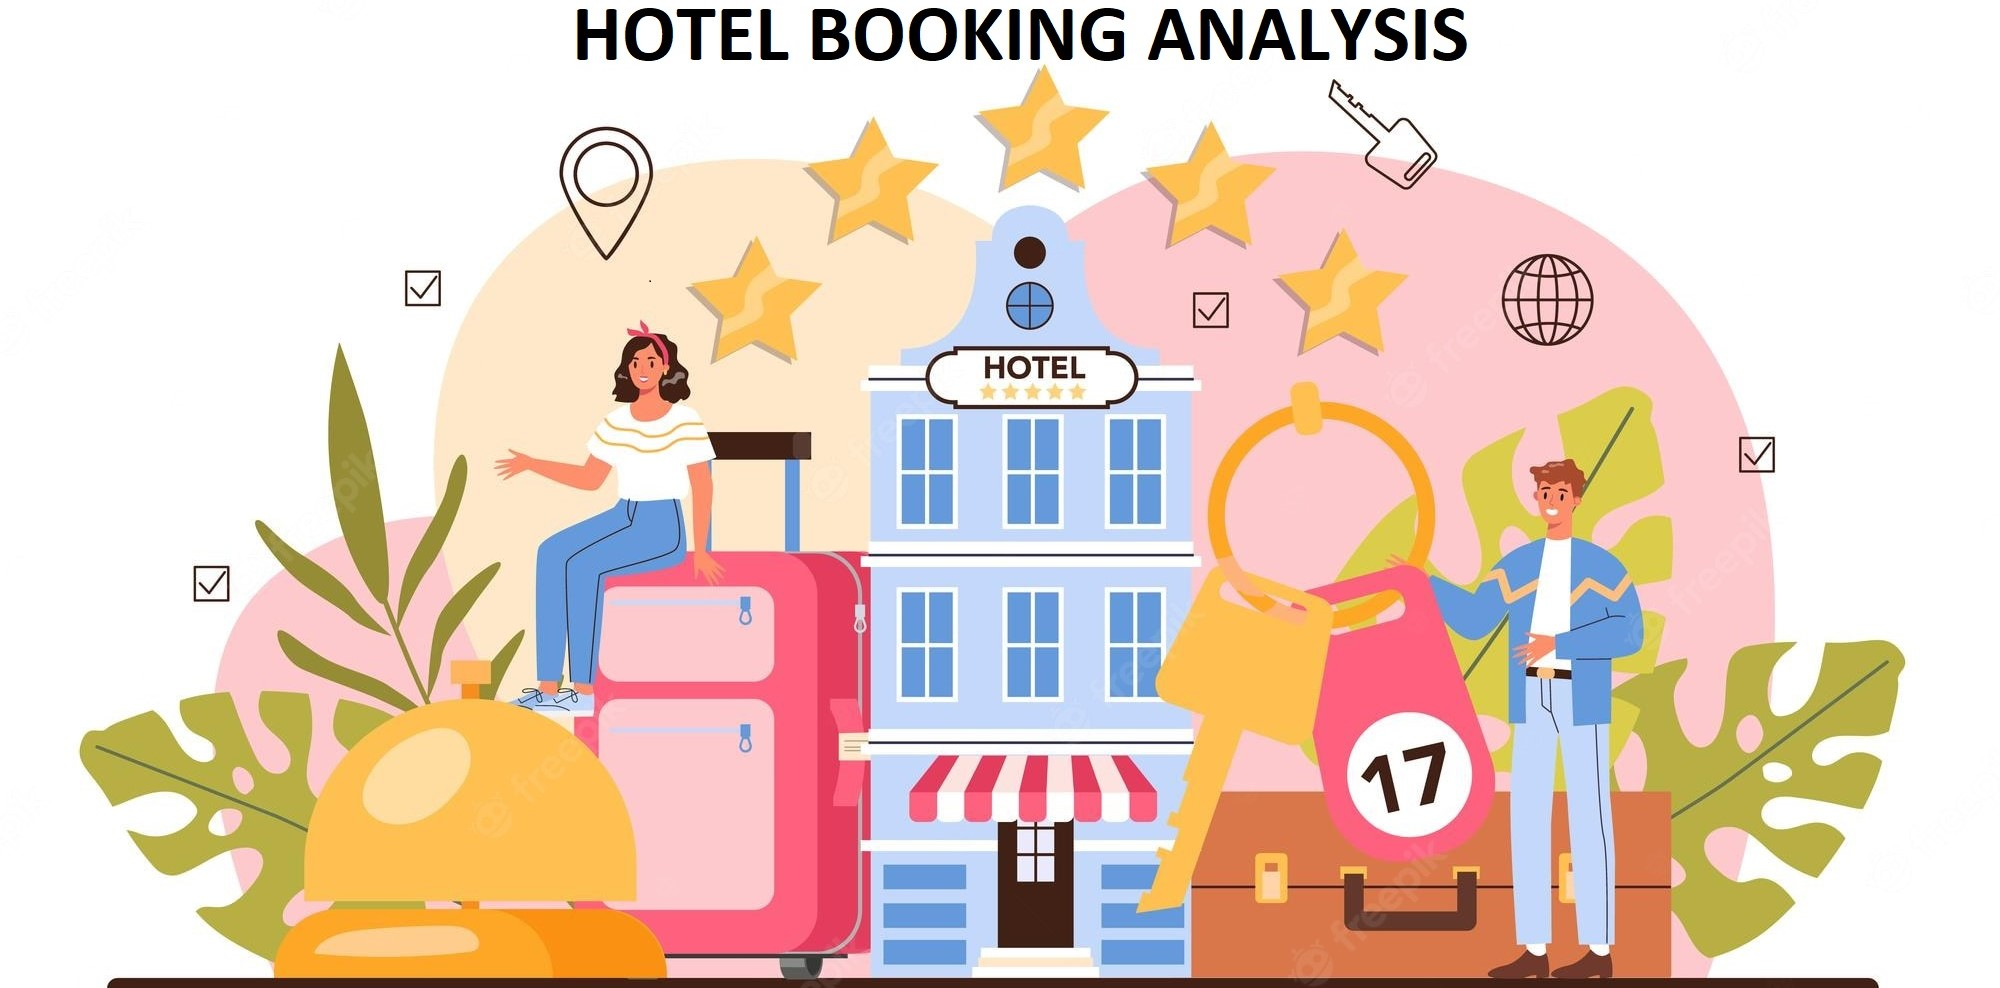

# <u>**Importing Essential Libraries:**</u>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%lsmagic
%matplotlib inline

#importing the folium library
import folium                                # searched on google 
import plotly.express as px

#<u>**Mounting drive**</u>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## csv file location and reading csv file

In [ ]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Exploratory Data Analysis/Hotel Booking Analysis/Hotel Bookings.csv')

#<u>**Data Exploration:**</u>

In [ ]:
#checking the shape ( rows and column numbers)
hotel_df.shape

(119390, 32)

In [ ]:
# Checking first 5 rows
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking last 5 rows
hotel_df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Looking into info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Column information:**

- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days thaat elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_numberr**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

#<u>**Data Cleaning**</u>
### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### Data cleaning is done in the following steps:-  
1) Remove duplicate rows  
2) Handling missing values.  
3) Convert columns to appropriate datatypes.  
4) Adding important columns

## Step-1: Remove duplicate rows

In [ ]:
# No. of duplicate rows
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

So we have 31994 duplicate rows in our data and we will drop the duplicate rows from our data.

In [ ]:
# Dropping duplicate values
hotel_df.drop_duplicates(inplace = True)

In [ ]:
hotel_df.shape

(87396, 32)

## Step-2: Handling missing values

In [ ]:
# Columns having missing values
hotel_df.isna().sum().sort_values(ascending= False) 

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


### Here, only 4 columns are null and the reason being customer didnt' book hotel via any agent or via any company.
### We will replace null values by 0 in these columns

In [ ]:
hotel_df[['company','agent','children']]= hotel_df[['company','agent','children']].replace(np.nan,0)

In [ ]:
hotel_df['country']= hotel_df['country'].replace(np.nan,'others')

In [ ]:
hotel_df.isna().sum().sort_values(ascending= False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null_counts'})

,Columns,Null_counts
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


### We have sucessfully handled the missing values.

## Step-3:  Convert columns to appropriate datatypes.

In [ ]:
# Converting from float to int
hotel_df = hotel_df.astype({'children':'int64','agent':'int64','company':'int64'})
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

## Step-4.) Adding new columns

In [ ]:
hotel_df['Total_stay']= hotel_df['stays_in_weekend_nights']+ hotel_df['stays_in_week_nights']
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


#<u>**EDA (Exploratory Data Analysis)**</u>

#<u>**Hotel wise Analysis:**</u>

## Q1.) Which type of hotel is mostly prefered by the guests?

In [ ]:
booking_df =hotel_df['hotel'].value_counts()

Text(0.5, 1.0, 'PERCENTAGE BOOKING IN EACH HOTEL')

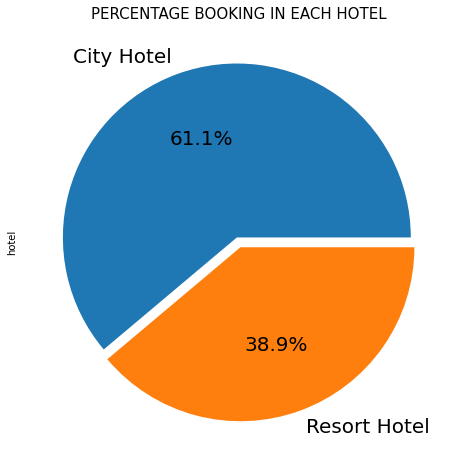

In [ ]:
ax = booking_df.plot.pie(figsize=(10,8),fontsize=20, autopct='%1.1f%%',explode=[0.03,0.03])

ax.set_title('PERCENTAGE BOOKING IN EACH HOTEL',fontsize=15)

**Analysis from above graph.**

1- City Hotel is most preffered by guests and thus city hotels has got maximum bookings.

## Q2.) Which hotel has higher booking cancellation rate? 

In [ ]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=hotel_df[hotel_df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['Total_bookings']=hotel_df.groupby('hotel').size().reset_index().drop('hotel',axis=1)
canceled_df

# Calculating cancel percentage
canceled_df['cancel %']= round(canceled_df['no_of_cancelled_bookings']/canceled_df['Total_bookings']*100,2)
canceled_df


,hotel,no_of_cancelled_bookings,Total_bookings,cancel %
0,City Hotel,16049,53428,30.04
1,Resort Hotel,7976,33968,23.48


Text(0.5, 1.0, 'PERCENTAGE BOOKING CANCELLATION')

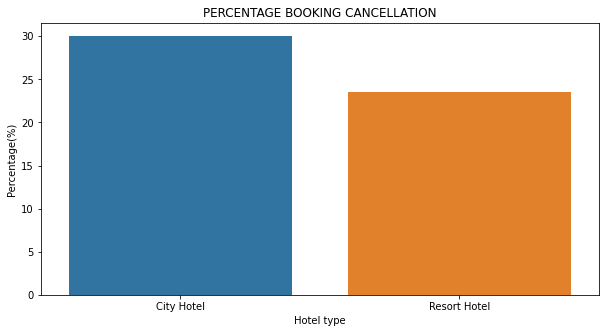

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['cancel %'])

# Set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("PERCENTAGE BOOKING CANCELLATION")

**Analysis from above graph.**

1-We have a huge proportion of cancellation rate for city hotel.

## Q3.) What is most preferred stay length in each hotel? 

In [ ]:

stay_df = hotel_df[hotel_df['is_canceled']==0]
stay_df =stay_df[stay_df['Total_stay'] < 15]
stay_df =stay_df.rename(columns={'is_canceled':'Number_of_stay'})


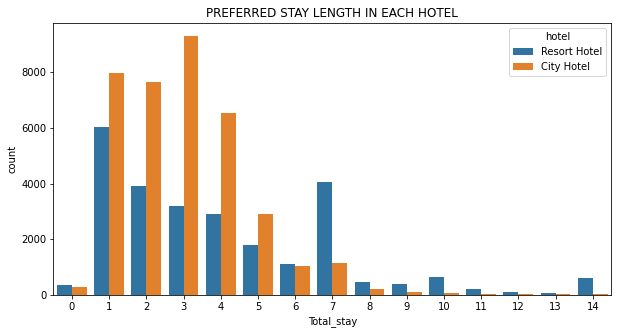

In [ ]:
# set plot size and plot barchart
plt.figure(figsize = (10,5))
plt.title('PREFERRED STAY LENGTH IN EACH HOTEL')
sns.countplot(x = stay_df['Total_stay'], hue = stay_df['hotel'])
plt.show()

**Analysis from above graph.**

1- Most common stay length is less than 4 days and generally people prefer city hotel for shorter stay, but for longer stay resort hotel is preferred.

## Q4.) Which hotel has higher lead time? 

In [ ]:
higher_lead = hotel_df.groupby('hotel')['lead_time'].mean().reset_index().rename(columns={'lead_time':'avg_lead_time'})
higher_lead

,hotel,avg_lead_time
0,City Hotel,77.678521
1,Resort Hotel,83.371938


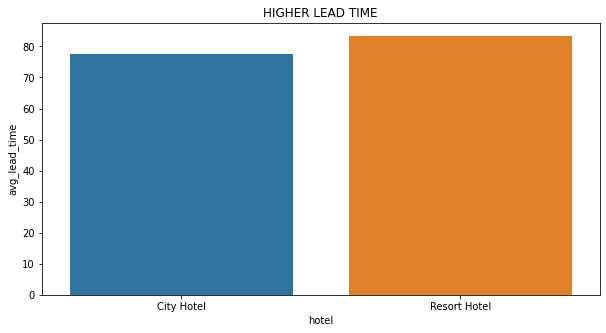

In [ ]:
plt.figure(figsize=(10,5))
plt.title('HIGHER LEAD TIME')
sns.barplot(x=higher_lead['hotel'],y=higher_lead['avg_lead_time'])
plt.show()

**Analysis from above graph.**

1- Resort hotel has slightly high avg lead time. That means customers plan their trips very early. 

## Q5.) Which hotel makes more revenue? 

In [ ]:
revenue_df = hotel_df.groupby('hotel')['adr'].mean().reset_index().rename(columns={'adr':'avg_adr'})  # calculating average adr
revenue_df

,hotel,avg_adr
0,City Hotel,110.985944
1,Resort Hotel,99.025346


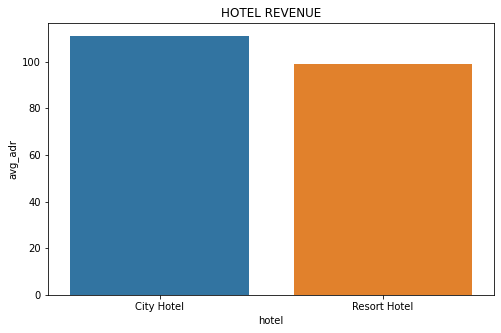

In [ ]:
plt.figure(figsize = (8,5))
plt.title('HOTEL REVENUE')

# Setting x and y value
sns.barplot(x = revenue_df['hotel'], y = revenue_df['avg_adr'])
plt.show()

**Analysis from above graph.**

1- City hotels has slightly high avg lead time then resort hotel.Thus, city hotel makes slightly more revenue then resort hotel.

## Q6.) Which hotel has the higher customer retention rate?

In [ ]:
# repeated_guest=1 
# no_repeated_guest= 0

# creating new DataFrame where bookings are cancelled.
repeated_guest=hotel_df[hotel_df['is_repeated_guest']==1]

# Grouping by hotel
repeated_guest=repeated_guest.groupby('hotel').size().reset_index().rename(columns={0: "Total_repeated_guest"})

# # adding 'total booking column for calculating the percentage.
repeated_guest['Total_bookings']=hotel_df.groupby('hotel').size().reset_index().drop('hotel',axis=1)

#Calculating retention_rate
repeated_guest['retention_rate']= round(repeated_guest['Total_repeated_guest']/canceled_df['Total_bookings']*100,2)
repeated_guest

,hotel,Total_repeated_guest,Total_bookings,retention_rate
0,City Hotel,1708,53428,3.20
1,Resort Hotel,1707,33968,5.03


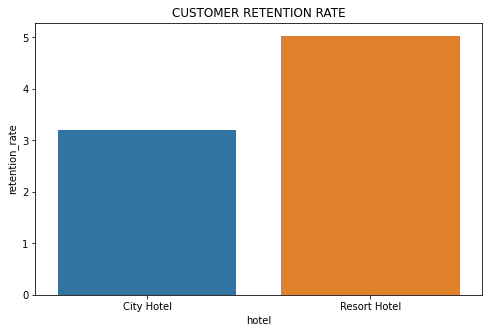

In [ ]:
plt.figure(figsize = (8,5))
plt.title('CUSTOMER RETENTION RATE')

# Setting x and y value
sns.barplot(x = repeated_guest['hotel'], y = repeated_guest['retention_rate'],)
plt.show()

**Analysis from above graph.**

1-Resort hotel has higher retention rate compare to city hotel that means customers are willing to stay again in resort hotel.


2- But retention rate for city hotel 3.20% and for resort hotel is 5.03% which is very less.



## Q7.)	For which hotel, does people have to wait longer to get a booking confirmed? 

In [ ]:
waiting_df =hotel_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'Avg_waiting_time'})
waiting_df

,hotel,Avg_waiting_time
0,City Hotel,1.020233
1,Resort Hotel,0.323834


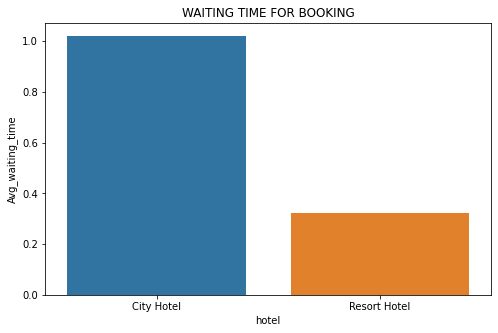

In [ ]:
plt.figure(figsize = (8,5))
plt.title('WAITING TIME FOR BOOKING')
sns.barplot(x = waiting_df['hotel'], y = waiting_df['Avg_waiting_time'] )
plt.show()

**Analysis from above graph.**

1- City hotel has significantly longer waiting time then resort hotel, hence City Hotel is much busier than Resort Hotel.

##Q8.) From which country most guest come?

Text(0.5, 1.0, 'NUMBER OF GUESTS FROM DIFFERENT COUNTRIES')

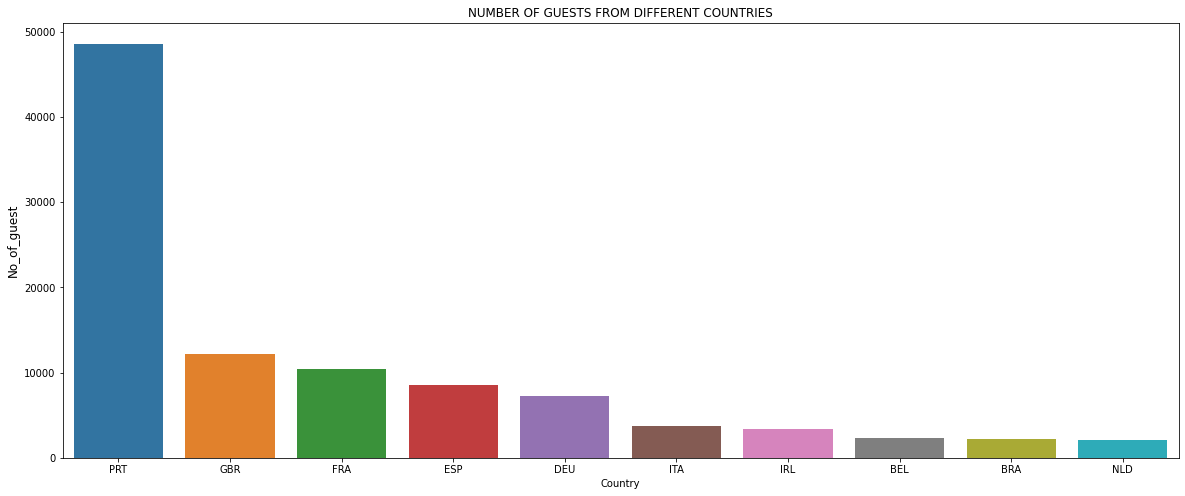

In [ ]:
# Counting the guests from various countries.
country_df=hotel_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'No_of_guest'})[:10]
country_df

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['No_of_guest'])
plt.xlabel('Country')
plt.ylabel('No_of_guest',fontsize=12)
plt.title("NUMBER OF GUESTS FROM DIFFERENT COUNTRIES")

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['No_of_guest'], hover_name = country_df['country'])
guests_map.show()

**Analysis from above graph.**

1-  We have a huge number of visitors from western europe, namely Portugal, UK and France being the highest. 

2-  We can instruct the marketing team to target people of this region






#<u>**Conclusion:**</u>

1.City Hotel is most preferred by guests and thus city hotels has got maximum number of bookings.

2.We have a huge proportion of cancellation rate for city hotel.

3.Most common stay length is less than 4 days and generally people prefer city hotel for shorter stay, but for longer stay resort hotel is preferred.

4.Resort hotel has slightly high avg lead time that means customers plan their trips very early.

5.City hotels has slightly high avg lead time then resort hotel.Thus, city hotel makes slightly more revenue then resort hotel.

6.Resort hotel has higher retention rate compare to city hotel that means customers are willing to stay again in resort hotel but retention rate for city hotel 3.20% and for resort hotel is 5.03% which is very less.

7.City hotel has significantly longer waiting time then resort hotel, hence city Hotel is much busier than Resort Hotel.

8.We have a huge number of visitors from western europe, namely Portugal, UK and France being the highest.We can instruct the marketing team to target people of this region.